### Import

In [3]:
import pandas as pd
import numpy as np
import csv
import re

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import AffinityPropagation

from matplotlib import pyplot as plt
%matplotlib inline

### Parametere

In [4]:
n_clusters=5
#type='Interesse' 
type='Kompetanse' 
#type='Kombinert' 


### Funksjoner

In [5]:
def group_variables(df, cats):
    
    ucats = set([])
    col2cat = {}
    
    # Hent kompetansekategoriseringen og lagre i col2cat og ucats
    with open('Kategorier kompetanse og interesser.csv', 'r') as f:
        reader = csv.reader(f, delimiter=';')
        next(reader, None)
        for row in reader:
            col2cat[row[0]] = {'Kategori': row[1], 'Underkategori': row[2]}
            ucats.add(row[2])
    
    # Lag nytt datasett med variabler som er snittet i hver underkategori
    dfc = df.reset_index()[['Navn', 'Team']]
    for ucat in ucats:
        col_subset = np.matrix(df[[col for col in df.columns if col2cat[col]['Underkategori'] == ucat]])
        dfc_add = pd.DataFrame(col_subset.sum(1)/col_subset.shape[1], columns=[ucat])
        dfc = pd.concat([dfc, dfc_add], axis=1)
        
    dfc.set_index(['Navn','Team'],inplace=True)
        
    return dfc

def do_pca(df):
    pca = PCA(n_components=2)
    dfs = preprocessing.scale(ndf,with_std=False)
    pca.fit(dfs)
    transformed_df = pca.transform(dfs)
    newdf = pd.concat([df.reset_index()[['Navn', 'Team']], pd.DataFrame(transformed_df)], axis=1)
    components = pd.concat([df.transpose().reset_index()['index'], pd.DataFrame({'1':pca.components_[0]}), pd.DataFrame({'2':pca.components_[1]})], axis=1).set_index('index')
    return newdf, components


def plot_pca(df):
    ms = 90
    ax = df[df['Team']=='IM'].plot(kind='scatter', x=0, y=1, s=ms, color='b', label='IM', figsize=(8,8))
    df[df['Team']=='BST' ].plot(kind='scatter', x=0, y=1, s=ms, color='r', label='BST', ax=ax)
    df[df['Team']=='ITST'].plot(kind='scatter', x=0, y=1, s=ms, color='y', label='ITST', ax=ax)

    for navn, team, x, y in df.values:
        if team == 'IM':
            horz = 'right'
        else:
            horz = 'left'
        shortname = re.match('([A-Za-z]+)\,?', navn).group(1)
        plt.annotate(shortname, xy=(x, y), textcoords = 'offset points', xytext = (0,8), horizontalalignment = horz)
    
    plt.title('PCA-analyse av %s' % type)
    pass

def plot_component(components, ind):
    
    a = max(abs(components[str(ind)]))
    
    plt.figure()
    components.sort(str(ind))[str(ind)].plot(kind='barh', xlim=(-1.1*a,1.1*a), figsize=(8,10), title='PCA component ' + str(ind));

    pass

def plot_most_component(components, ind):
    
    a = max(abs(components[str(ind)]))
    
    plt.figure()
    components_sorted = components.sort(str(ind))[str(ind)]
    subset = pd.concat([components_sorted[:3],components_sorted[-3:]])
    subset.plot(kind='barh', xlim=(-1.1*a,1.1*a), figsize=(8,6), title='PCA component ' + str(ind));

    pass


def plot_component_kristine(components, ind):
    components_im = components[components['Kategori']=='IM']
    components_bst = components[components['Kategori']=='BST']
    components_itst = components[components['Kategori']=='ITST']
    components_tverr = components[components['Kategori']=='Tverrfaglige kompetanser ']

    fig = plt.figure(figsize=(25,25))

    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)print()

    p1 = plt.barh(components_im.index, components_im.sort(str(ind))[str(ind)], left=0, color='b')
    p2 = plt.barh(components_bst.index, components_bst.sort(str(ind))[str(ind)], left=0,color='r')
    p3 = plt.barh(components_itst.index, components_itst.sort(str(ind))[str(ind)], left=0,color='g')
    if(type=='Kombinert' or type=='Kompetanse'):
        p4 = plt.barh(components_tverr.index, components_tverr.sort(str(ind))[str(ind)], left=0,color='y')

    axes.set_yticks(components.index)
    axes.set_yticklabels(components['index'], figure=fig, size=20)
    
    plt.title('PCA-komponent %d for analyse av %s' % (ind,type))
    
    plt.show()
    pass

### Datasett

In [6]:
df = pd.io.parsers.read_csv(type+"_formatert.csv", sep=';', index_col=[0,1])
df.dropna(how='any', inplace=True)

cats = pd.io.parsers.read_csv('Kategorier kompetanse og interesser.csv', sep=';')

ndf = group_variables(df, cats)



### PCA-analyse

In [7]:
newdf, components = do_pca(ndf)

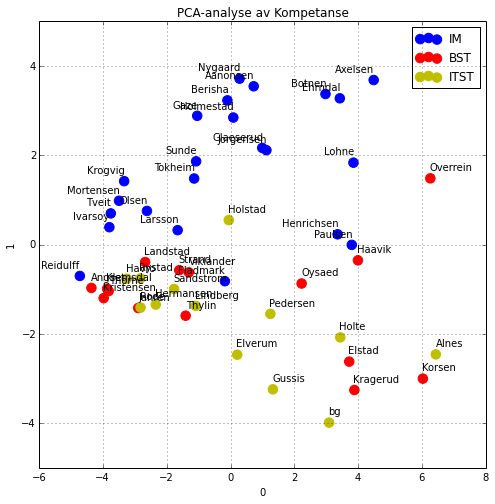

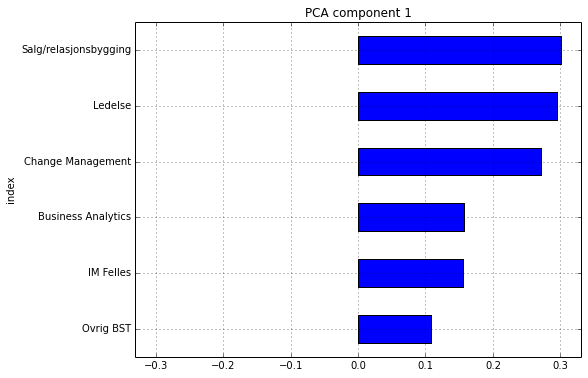

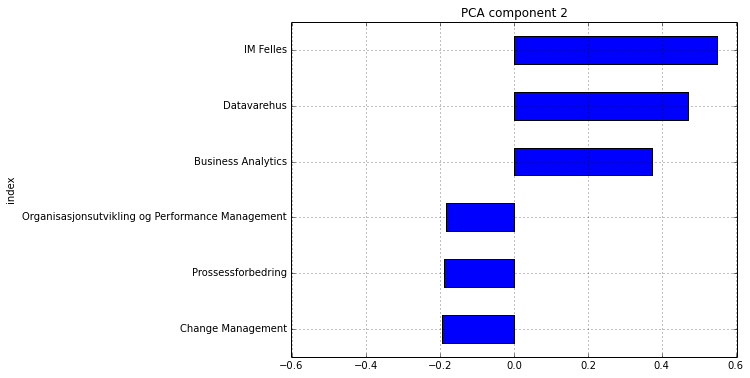

In [8]:
plot_pca(newdf)

## Hent inn kategorier per kompetanse/interesse
#kompetanse_type= pd.io.parsers.read_csv('Kategorier kompetanse og interesser.csv', sep=';', header=0, usecols=[1])
#interesse_type= pd.io.parsers.read_csv('Kategorier kompetanse og interesser.csv', sep=';', header=None, usecols=[1], skiprows=33)
#interesse_type.columns=['Kategori']
#kombinert_type = pd.concat([kompetanse_type,interesse_type], axis=0, ignore_index=True)
#
#if type=='Kompetanse':
#    feature_type=kompetanse_type
#elif type=='Interesse':
#    feature_type = interesse_type
#else:
#    feature_type = kombinert_type
#
#components.reset_index(inplace=True)
#components = pd.concat([components, feature_type], axis=1)
#
#
plot_most_component(components,1)
plot_most_component(components,2)


In [20]:
ndf

,,Prossessforbedring,Salg/relasjonsbygging,IT-Governance,Effektiv kommunikasjon,Business Intelligence,Basic IT verktoey og IT forstaelse,Master Data Management,IT-Assessment,IT-Strategi,Strategi,...,Grunnleggende kjernekompetanser (Core),IT-Anskaffelse,Supply Chain,IM Felles,Compliance & andre emner,Business Analytics,"Industri (account perspektiv, TBD)",Ledelse,Change Management,Datavarehus
Navn,Team,,,,,,,,,,,,,,,,,,,,,
"Aanonsen, Tor",IM,2.000000,2.500000,2.0,3.0,2.00,4.0,2.00,1.00,1.000000,2.00,...,3.000000,1.428571,1.166667,4.000000,3.333333,4.75,2.25,3.0,1.285714,4.000000
"Axelsen, Vebjorn",IM,2.333333,3.500000,2.5,4.0,3.50,4.5,3.25,2.75,2.333333,2.75,...,3.571429,2.714286,1.000000,5.000000,3.666667,5.00,2.50,3.6,3.000000,4.333333
"Berisha, Arber",IM,1.000000,2.333333,1.0,3.2,2.25,4.0,1.75,1.00,1.000000,1.50,...,3.285714,1.142857,1.333333,3.666667,3.000000,4.50,2.25,2.6,1.142857,3.333333
"Botnen, Martin",IM,1.333333,3.166667,2.5,3.8,4.00,4.5,3.00,1.75,2.000000,2.25,...,3.571429,2.285714,1.000000,5.000000,3.666667,2.50,2.50,3.4,2.000000,4.000000
"Ehrndal, Marcus",IM,2.666667,3.333333,2.0,3.8,3.00,4.5,3.50,1.00,1.000000,2.25,...,3.857143,2.285714,2.333333,4.333333,4.000000,4.75,2.75,3.6,1.714286,4.000000
"Fladmark, Baste",IM,2.333333,1.500000,2.5,2.0,2.25,4.0,1.25,1.75,1.000000,2.75,...,2.428571,1.714286,2.666667,2.666667,2.666667,1.50,2.00,1.8,1.857143,1.666667
"Gaze, Kevin",IM,1.000000,2.000000,1.0,3.0,1.75,3.0,2.25,1.00,1.000000,1.00,...,2.857143,1.571429,1.333333,3.666667,3.666667,3.25,1.50,2.0,1.285714,3.333333
"Glaeserud, Pia",IM,2.333333,2.333333,2.0,3.2,3.50,3.5,2.00,1.00,1.000000,2.50,...,3.142857,1.714286,2.166667,3.000000,3.333333,4.50,2.25,2.6,1.714286,2.666667
"Henrichsen, Kristian",IM,3.000000,2.500000,2.5,3.2,2.75,4.0,2.25,3.00,2.000000,3.75,...,3.428571,2.428571,3.000000,4.333333,3.666667,1.25,2.75,3.4,2.428571,3.333333


### KMeans-clustering

In [ ]:
from sklearn.cluster import KMeans

cluster_df = pd.concat([pd.DataFrame(newdf[0]), pd.DataFrame(newdf[1])], axis=1)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(cluster_df)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = cluster_df[0].min() - 1,cluster_df[0].max() + 1
y_min, y_max = cluster_df[1].min() - 1, cluster_df[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(30,15))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='Spectral',
           aspect='auto', origin='lower')


# Plot the centroids as a white X
#centroids = kmeans.cluster_centers_
#plt.scatter(centroids[:,0], centroids[:,1],
#            marker='x', s=20, linewidths=3,
#            color='w', zorder=10)

plt.title('K-means clustering over %s med %d clusters' % (type, n_clusters))


cluster_df = pd.concat([df.reset_index()[['Navn', 'Team']], cluster_df], axis=1, ignore_index=True)
cluster_df.columns=['Navn','Team',0,1]

ax = plt.plot(cluster_df[cluster_df['Team']=='IM'][0], cluster_df[cluster_df['Team']=='IM'][1], 'k.', markersize=20,color='b')
plt.plot(cluster_df[cluster_df['Team']=='BST'][0], cluster_df[cluster_df['Team']=='BST'][1], 'k.', markersize=20,color='r')
plt.plot(cluster_df[cluster_df['Team']=='ITST'][0], cluster_df[cluster_df['Team']=='ITST'][1], 'k.', markersize=20,color='g')

#ax = df[df['Team']=='IM'].plot(kind='scatter', x=0, y=1, s=ms, color='Turquoise', label='IM', figsize=(12,12))
#df[df['Team']=='BST' ].plot(kind='scatter', x=0, y=1, s=ms, color='Gold', label='BST', ax=ax)
#df[df['Team']=='ITST'].plot(kind='scatter', x=0, y=1, s=ms, color='Red', label='ITST', ax=ax)

for navn, team, x, y in cluster_df.values:
    if team == 'IM':
        color = 'b'
    elif team == 'BST':
        color = 'r'
    else:
        color='g'
    shortname = re.match('([A-Za-z]+)\,?', navn).group(1)
    plt.annotate(shortname, xy=(x, y), textcoords = 'offset points', xytext = (0,8), size=18, color=color)

plt.xticks(())
plt.yticks(())
plt.show()


### Affinity propagation clustering

In [ ]:

##############################################################################
# Compute Affinity Propagation
cluster_df = pd.concat([pd.DataFrame(newdf[0]), pd.DataFrame(newdf[1])], axis=1)
X=cluster_df.as_matrix()

af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

##############################################################################
# Plot result

plt.close('all')
plt.figure(figsize=(20,10))
plt.clf()

colors = cycle('rgcmykb')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, linewidth=2.0)

plt.title('Affinity Propagation clustering for %s med %d cluster' % (type,n_clusters_))

cluster_df = pd.concat([df.reset_index()[['Navn', 'Team']], cluster_df], axis=1, ignore_index=True)
cluster_df.columns=['Navn','Team',0,1]

ax = plt.plot(cluster_df[cluster_df['Team']=='IM'][0], cluster_df[cluster_df['Team']=='IM'][1], 'k.', markersize=20,color='b')
plt.plot(cluster_df[cluster_df['Team']=='BST'][0], cluster_df[cluster_df['Team']=='BST'][1], 'k.', markersize=20,color='r')
plt.plot(cluster_df[cluster_df['Team']=='ITST'][0], cluster_df[cluster_df['Team']=='ITST'][1], 'k.', markersize=20,color='g')

for navn, team, x, y in cluster_df.values:
    if team == 'IM':
        color = 'b'
        horz='right'
    elif team == 'BST':
        color = 'r'
        horz='left'
    else:
        color='g'
        horz='center'
    shortname = re.match('([A-Za-z]+)\,?', navn).group(1)
    plt.annotate(shortname, xy=(x, y), textcoords = 'offset points', xytext = (0,8), size=10, color=color, ha=horz)
    
plt.xticks(())
plt.yticks(())
plt.show()